<a href="https://colab.research.google.com/github/official-okello/DS_bootcamp_with_gomycode/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# AutoRegressive Integrated Moving Average
# Statistiacl modeling technique specifically designed for Time Series Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

<ipython-input-3-e1772507c66c>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Month": pd.date_range(start="2023-01-01", periods=12, freq="M"),


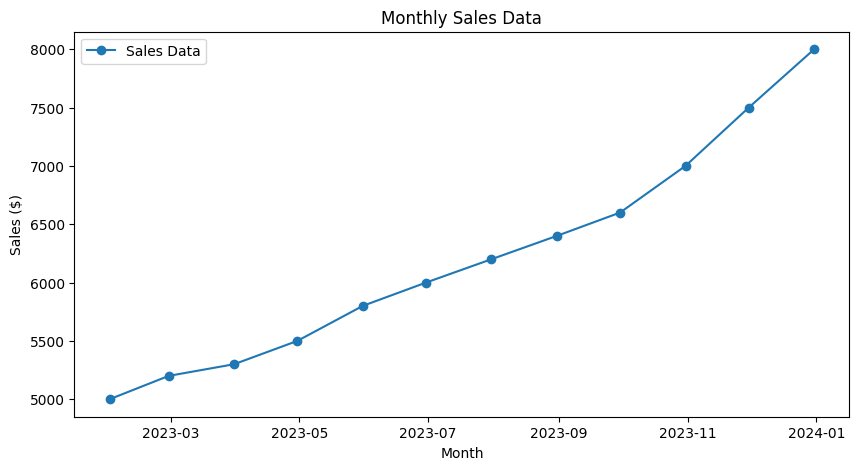

In [3]:
data = {
    "Month": pd.date_range(start="2023-01-01", periods=12, freq="M"),
    "Sales": [5000, 5200, 5300, 5500, 5800, 6000, 6200, 6400, 6600, 7000, 7500, 8000]
}

df = pd.DataFrame(data)
df.set_index("Month", inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df, marker="o", linestyle="-", label="Sales Data")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.title("Monthly Sales Data")
plt.legend()
plt.show()

In [5]:
model = ARIMA(df, order=(1, 1, 1)) # p, d, q
arima_result = model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -65.883
Date:                Mon, 31 Mar 2025   AIC                            137.767
Time:                        11:56:20   BIC                            138.961
Sample:                    01-31-2023   HQIC                           137.015
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8496      0.163      5.212      0.000       0.530       1.169
ma.L1          0.9905      9.399      0.105      0.916     -17.431      19.412
sigma2      5743.8034    5.6e+04      0.103      0.9

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [7]:
forecast = arima_result.forecast(steps=12)

In [9]:
# Evaluate model performance

train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

model_train = ARIMA(df, order=(1, 1, 1)).fit()
predictions = model_train.forecast(steps=len(test_data))

mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean Squared Error: 1900766.8841624304
Mean Absolute Error: 1375.150093737564
Root Mean Squared Error: 1378.683025268111


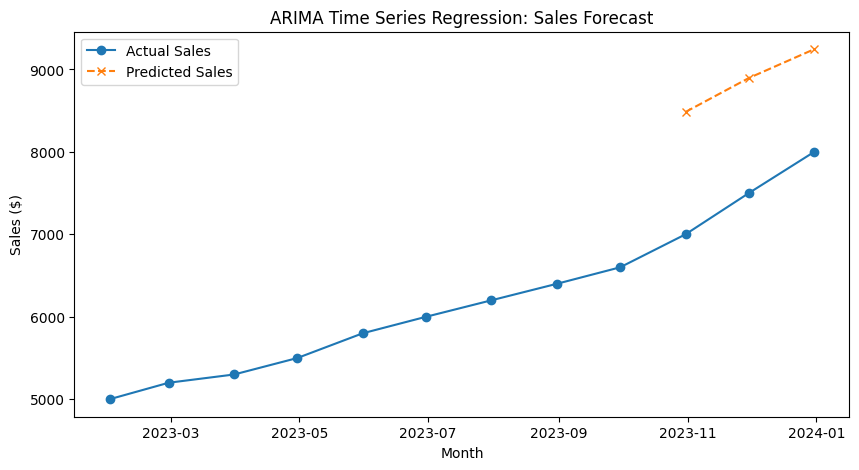

In [11]:
# Visualizing
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Sales"], label="Actual Sales", marker="o")
plt.plot(test_data.index, predictions, label="Predicted Sales", linestyle="dashed", marker="x")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.title("ARIMA Time Series Regression: Sales Forecast")
plt.legend()
plt.show()